
<span style='color:black'><h1><b>Importing Libraries </b></h1></span>

In [1]:
import pandas as pd #Data manipulation
import numpy as np  #matrices and Mathematical functions
import nltk         #Text manipulation
from nltk.corpus import stopwords
import string       #Text manipulation
import re           #Regular expression
import emoji        #for getting Emoji
import matplotlib.pyplot as plt  #Graph ploting


# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

from sklearn.model_selection import train_test_split  #spliting dataset into train and test
from sklearn.feature_extraction.text import TfidfVectorizer #for feature extraction from textual dataset

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import svm




In [2]:
dataset=pd.read_csv('dataset.csv')
dataset.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [3]:
required_data=dataset.loc[:,['Rating','Reviews']]
required_data.head()

,Rating,Reviews
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...


<AxesSubplot:>

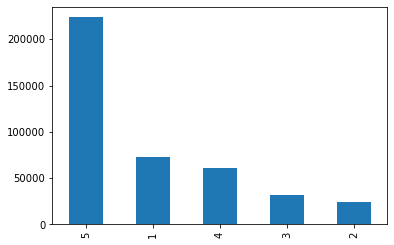

In [4]:
required_data
required_data['Rating'].value_counts().plot(kind='bar')

<span style='color:black'><h1><b>Labelling dataset and remove NULL values</b></h1></span>

In [5]:
def label_data(data):
    data.loc[data['Rating']>=4,'Labels']='2' #Good
    data.loc[data['Rating']==3,'Labels']='1' #Neutral
    data.loc[data['Rating']<3,'Labels']='0'  #Poor

In [6]:
def remove_NA(data):
    #for count total NA values:dataset.isna().sum().sum()
    data.replace('',np.nan,inplace=True)
    data.dropna(axis=0,how='any',inplace=True)
    data.to_csv('Labelled-dataset.csv',index=False)

In [7]:
label_data(required_data)
remove_NA(required_data)
required_data.head()

,Rating,Reviews,Labels
0,5,I feel so LUCKY to have found this used (phone...,2
1,4,"nice phone, nice up grade from my pantach revu...",2
2,5,Very pleased,2
3,4,It works good but it goes slow sometimes but i...,2
4,4,Great phone to replace my lost phone. The only...,2


# Clean Text

In [8]:
def cleanText(text):
    '''
    Convert a raw review to a cleaned review
    '''
    #Remove @mentions
    text=re.sub("@[A-Za-z0-9]",' ',text)
    
    #Remove http links
    text=re.sub(r"(?:\@|http?\://|https?\://|www)\S+",' ', text)  
    
    #Remove non-character
    text=re.sub("[^a-zA-Z]",' ',text)
    
    #Convert to lower case
    text=text.lower().split() 
    
    #Remove Emojis
    text=[c for c in text if c not in emoji.UNICODE_EMOJI] 

    #Remove Stop words
    stops=set(stopwords.words("english"))
    text=[w for w in text if w not in stops] 
    
    #Applying Stemming
    st = nltk.PorterStemmer()
    text = [st.stem(word) for word in text]

    return(' '.join(text))

In [9]:
required_data['Clean_Reviews'] = required_data['Reviews'].apply(lambda text:cleanText(text))

In [10]:
required_data.head()

,Rating,Reviews,Labels,Clean_Reviews
0,5,I feel so LUCKY to have found this used (phone...,2,feel lucki found use phone us use hard phone l...
1,4,"nice phone, nice up grade from my pantach revu...",2,nice phone nice grade pantach revu clean set e...
2,5,Very pleased,2,pleas
3,4,It works good but it goes slow sometimes but i...,2,work good goe slow sometim good phone love
4,4,Great phone to replace my lost phone. The only...,2,great phone replac lost phone thing volum butt...


# Plotting Graphs

In [11]:
rd=required_data

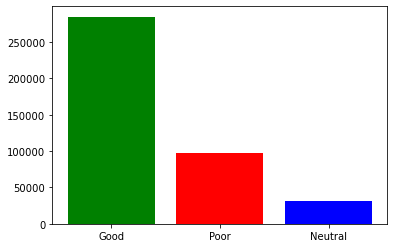

In [12]:
label_cnt=rd['Labels'].value_counts()
reviews=["Good","Poor","Neutral"]
cnt=[label_cnt[0],label_cnt[1],label_cnt[2]]
plt.bar(reviews,cnt,color=["green","red","blue"])
plt.show()

2    284954
0     97061
1     31763
Name: Labels, dtype: int64


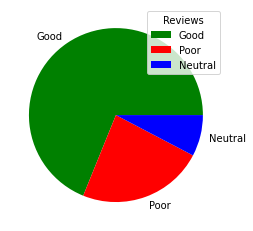

In [13]:
label_cnt=rd['Labels'].value_counts()
print(label_cnt)
reviews=["Good","Poor","Neutral"]
cnt=[label_cnt[0],label_cnt[1],label_cnt[2]]
plt.pie(cnt,labels=reviews,colors=["green","red","blue"])
plt.legend(title="Reviews",loc='best')
plt.show()

# Word Clouds

In [14]:
# function to display word cloud
from wordcloud import WordCloud,STOPWORDS

def Create_WordCloud_for_sentiment(targz):
    df_tmp1 = pd.DataFrame() 
    if (targz == -1) :
        df_tmp1 = rd
    else:
        df_tmp1 = rd.loc[rd['Labels']==str(targz)]
        
    wrdz = " ".join(df_tmp1.Clean_Reviews)
    wrdclud = WordCloud(stopwords=STOPWORDS,width=1500,
                      background_color='black',
                      height=1000).generate(wrdz)
    plt.figure(figsize=(15,10))
    plt.imshow(wrdclud)
    plt.axis('off')
    plt.show()

##### All Reviews

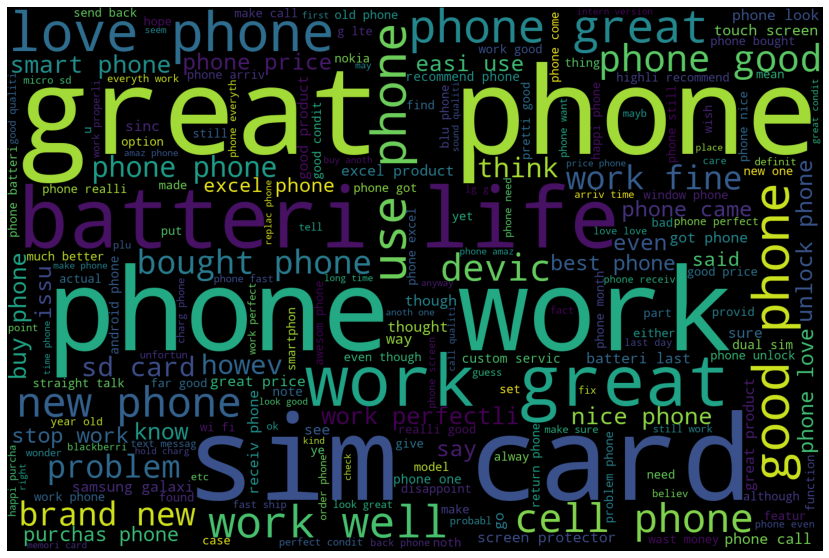

In [15]:
Create_WordCloud_for_sentiment(-1)

##### Good Reviews

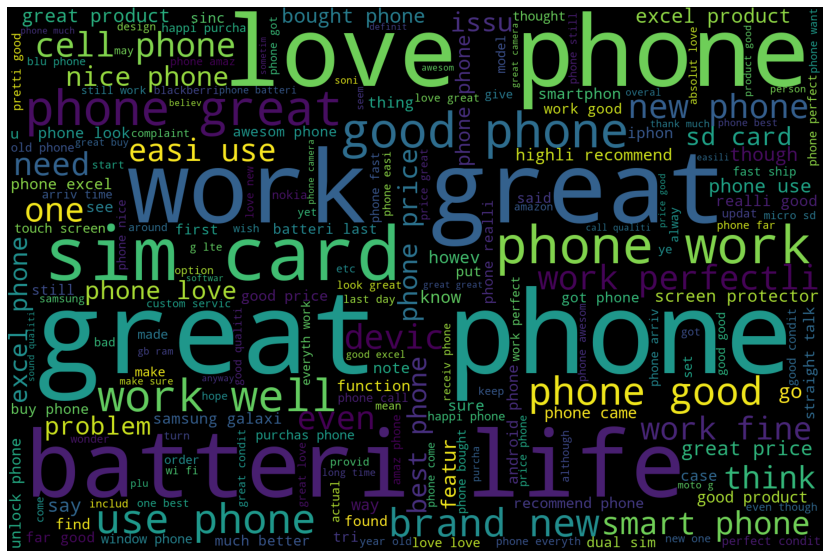

In [16]:
Create_WordCloud_for_sentiment(2)

#### Neutral Reviews 

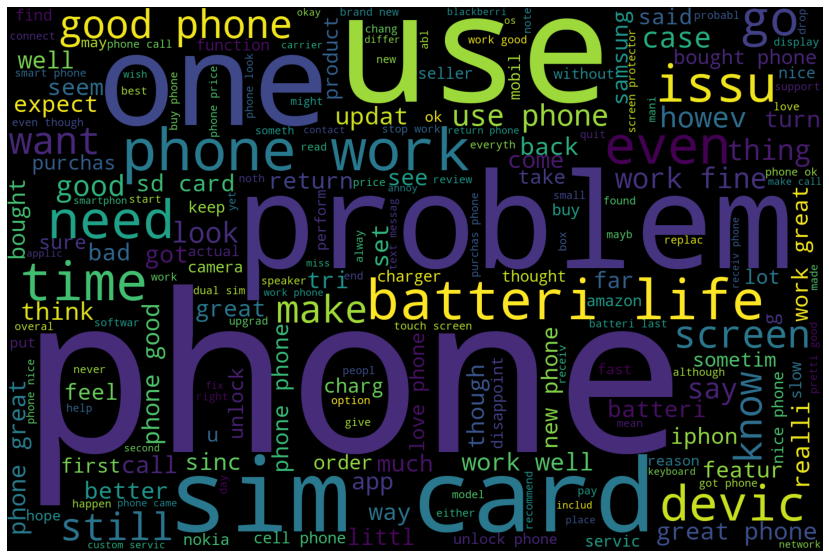

In [17]:
Create_WordCloud_for_sentiment(1)

#### Poor Reviews 

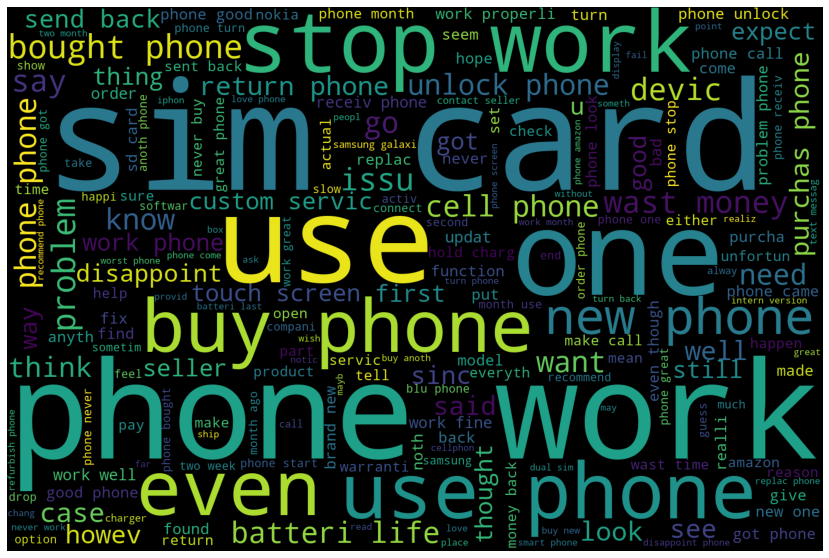

In [18]:
Create_WordCloud_for_sentiment(0)

# Model training-testing and performance checking by splitting labelled dataset

In [21]:
main_ds=rd

In [164]:
rd=main_ds.sample(n=75000)

In [165]:
rd.shape

(75000, 4)

In [166]:
x_train,x_test,y_train,y_test = train_test_split(rd['Clean_Reviews'],rd['Labels'], test_size=0.3, random_state=12)

In [167]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf=tfidf.transform(x_test)
print(f"Number of features: {len(tfidf.get_feature_names())}\n")
print(f"Show some feature names :{tfidf.get_feature_names()[::1000]}")



Number of features: 5542

Show some feature names :['aaa', 'cook', 'gate', 'mi', 'resin', 'transpar']


In [170]:
classifier = [KNeighborsClassifier(n_neighbors = 5),
              DecisionTreeClassifier(),
              XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3),
              MultinomialNB(), 
              RandomForestClassifier(n_estimators=1000, random_state=42),
              LogisticRegression(),
              svm.SVC(),
              MLPClassifier(random_state=1, max_iter=200) ]
clss_name = []

In [171]:
tmp = 0
accu = []
for clf in classifier :
    mdl = clf.fit(x_train_tfidf,y_train)
    labl_predicted = mdl.predict(x_test_tfidf)
    cnt = (100*accuracy_score(labl_predicted, y_test))
    cnt = round(cnt,2)
    accu.append(cnt)
    clss_name.append(clf.__class__.__name__)
    print (f'{clss_name[tmp]}  Accuracy Score : {cnt}')
    print (classification_report(labl_predicted, y_test))
    tmp +=1

KNeighborsClassifier  Accuracy Score : 73.88
              precision    recall  f1-score   support

           0       0.29      0.70      0.41      2220
           1       0.09      0.48      0.15       331
           2       0.96      0.75      0.84     19949

    accuracy                           0.74     22500
   macro avg       0.45      0.64      0.47     22500
weighted avg       0.89      0.74      0.79     22500

DecisionTreeClassifier  Accuracy Score : 82.78
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      5371
           1       0.34      0.43      0.38      1349
           2       0.91      0.89      0.90     15780

    accuracy                           0.83     22500
   macro avg       0.67      0.69      0.67     22500
weighted avg       0.84      0.83      0.83     22500



C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier  Accuracy Score : 88.18
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      5367
           1       0.30      0.67      0.42       770
           2       0.96      0.91      0.94     16363

    accuracy                           0.88     22500
   macro avg       0.70      0.80      0.73     22500
weighted avg       0.91      0.88      0.89     22500

MultinomialNB  Accuracy Score : 82.74
              precision    recall  f1-score   support

           0       0.67      0.81      0.73      4387
           1       0.01      0.31      0.03        78
           2       0.97      0.83      0.90     18035

    accuracy  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression  Accuracy Score : 85.88
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      5489
           1       0.09      0.54      0.16       290
           2       0.96      0.89      0.92     16721

    accuracy                           0.86     22500
   macro avg       0.62      0.74      0.63     22500
weighted avg       0.91      0.86      0.88     22500

SVC  Accuracy Score : 88.14
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      5613
           1       0.18      0.85      0.30       367
           2       0.97      0.90      0.93     16520

    accuracy                           0.88     22500
   macro avg       0.67      0.86      0.69     22500
weighted avg       0.93      0.88      0.90     22500

MLPClassifier  Accuracy Score : 87.2
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5259
           1       0.

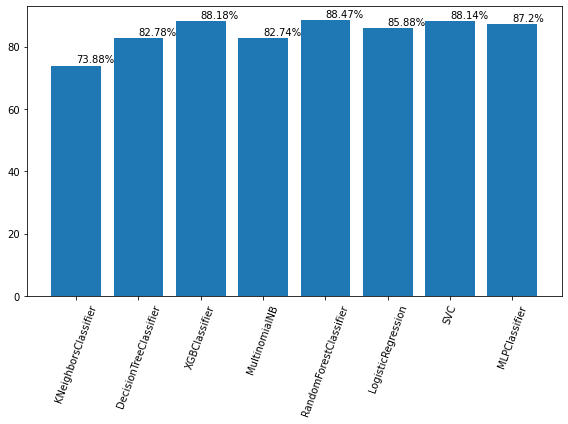

In [172]:
plt.figure(figsize=(8,6))
plt.bar(clss_name, accu)
plt.xticks(rotation=70)
for idx,val in enumerate(accu):
    plt.text(x=idx , y =val+1 , s=f"{val}%" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.show()

## Final model training with SVC and Random Forest Classifier

In [29]:
dt=main_ds.sample(n=125000)

In [30]:
x_train_f,x_test_f,y_train_f,y_test_f= train_test_split(dt['Clean_Reviews'],dt['Labels'], test_size=0.3, random_state=12)
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
x_train_tfidf_f = tfidf.fit_transform(x_train_f)
x_test_tfidf_f=tfidf.transform(x_test_f)
print(f"Number of features: {len(tfidf.get_feature_names())}\n")
print(f"Show some feature names :{tfidf.get_feature_names()[::1000]}")

Number of features: 7058

Show some feature names :['aa', 'cheek', 'eras', 'impact', 'neglig', 'reject', 'swindler', 'xpressmus']


In [31]:
cf_svm=svm.SVC()
mdl_svm = cf_svm.fit(x_train_tfidf_f,y_train_f)
labl_predicted_svm = mdl_svm.predict(x_test_tfidf_f)
cnt = (100*accuracy_score(labl_predicted_svm, y_test_f))
cnt = round(cnt,2)
print(f'Accuracy score: {cnt}')
print (classification_report(labl_predicted_svm, y_test_f))

Accuracy score: 89.58
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9188
           1       0.26      0.88      0.41       857
           2       0.97      0.92      0.94     27455

    accuracy                           0.90     37500
   macro avg       0.70      0.88      0.74     37500
weighted avg       0.93      0.90      0.91     37500



In [32]:
cf_rfc=RandomForestClassifier(n_estimators=1000, random_state=42)
mdl_rfc = cf_rfc.fit(x_train_tfidf_f,y_train_f)
labl_predicted_rfc = mdl_rfc.predict(x_test_tfidf_f)
cnt = (100*accuracy_score(labl_predicted_rfc, y_test_f))
cnt = round(cnt,2)
print(f'Accuracy score: {cnt}')
print (classification_report(labl_predicted_rfc, y_test_f))

Accuracy score: 89.99
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      8713
           1       0.36      0.95      0.52      1078
           2       0.98      0.91      0.94     27709

    accuracy                           0.90     37500
   macro avg       0.73      0.91      0.77     37500
weighted avg       0.93      0.90      0.91     37500



2    27709
0     8713
1     1078
dtype: int64


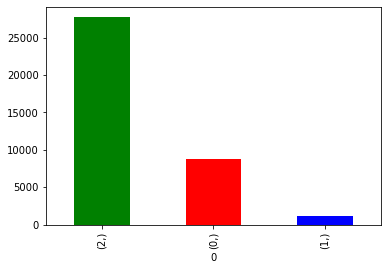

In [90]:
pd.DataFrame(labl_predicted_rfc).value_counts().plot(kind='bar',color=["green","red","blue"])
print(pd.DataFrame(labl_predicted_rfc).value_counts())

# Get live tweets from Twitter using twitter API

In [110]:
os.environ['TOKEN']='*******************************************************'
bearer_token = os.environ.get("TOKEN")

def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/recent" #Change to the endpoint we want to collect data from

    #change params based on the endpoint we are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)

def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()



keyword = "OnePlus Nord 2 lang:en"
start_time = "2021-10-15T00:00:00.000Z"
end_time = "2021-10-16T00:00:00.000Z"
max_results =100
_url = create_url(keyword, start_time,end_time, max_results)

url=_url[0]
query_params=_url[1]

json_response = connect_to_endpoint(url, query_params)
print(json.dumps(json_response, indent=4, sort_keys=True))



200
{
    "data": [
        {
            "author_id": "1283468915536883712",
            "conversation_id": "1449150486980923393",
            "created_at": "2021-10-15T23:09:34.000Z",
            "id": "1449150486980923393",
            "lang": "en",
            "public_metrics": {
                "like_count": 0,
                "quote_count": 0,
                "reply_count": 0,
                "retweet_count": 0
            },
            "reply_settings": "everyone",
            "source": "Twitter for Android",
            "text": "I am using nord and nord 2. Please add same nord camera app for nord 2 . It is worse no vivid mode quality is also poor. @OnePlus_IN @OnePlus_Support @oneplus @GyanTherapy @geekyranjit  . Please raise may be they listen yours."
        },
        {
            "author_id": "87537732",
            "conversation_id": "1449139057355808781",
            "created_at": "2021-10-15T22:24:09.000Z",
            "id": "1449139057355808781",
            "lang": "

In [56]:
# Create file
csvFile = open("data.csv", "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['ID','Created_at','Tweet'])
csvFile.close()

In [111]:
def append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open(fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['data']:
        tweet_id = tweet['id']
        tweet_time=tweet['created_at']
        text = tweet['text']
        
        # Assemble all data in a list
        res = [ tweet_id,tweet_time, text]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("Number of Tweets added from this response: ", counter) 


In [112]:
append_to_csv(json_response, "data.csv")

Number of Tweets added from this response:  55


# Analysis of live tweets 

In [113]:
live_data=pd.read_csv('data.csv')

In [114]:
remove_NA(live_data)
live_data['Clean_Tweets'] = live_data['Tweet'].apply(lambda text:cleanText(text))
live_data.head()

,ID,Created_at,Tweet,Clean_Tweets
0,1449150486980923393,2021-10-15T23:09:34.000Z,I am using nord and nord 2. Please add same no...,use nord nord pleas add nord camera app nord w...
1,1449139057355808781,2021-10-15T22:24:09.000Z,OnePlus Nord 2 5G: Why you will love this supe...,oneplu nord g love superb rounder phone
2,1449109717452673024,2021-10-15T20:27:34.000Z,"dosto aur mobile phone experts, should i buy o...",dosto aur mobil phone expert buy oneplu nord s...
3,1449060350750461956,2021-10-15T17:11:24.000Z,@OnePlus_IN One plus Nord 2 very bad,neplu one plu nord bad
4,1449057398765670401,2021-10-15T16:59:40.000Z,@OnePlus_Support \nA bug is irritating me whil...,neplu support bug irrit use oneplu nord distru...


In [115]:
def Create_WordCloud(targz):
    df_tmp1 = pd.DataFrame() 
    if (targz == -1) :
        df_tmp1 = live_data
    else:
        df_tmp1 = live_data.loc[live_data['Prediction']==str(targz)]
    wrdz = " ".join(df_tmp1.Clean_Tweets)
    wrdclud = WordCloud(stopwords=STOPWORDS,width=1500,
                      background_color='black',
                      height=1000).generate(wrdz)
    plt.figure(figsize=(15,10))
    plt.imshow(wrdclud)
    plt.axis('off')
    plt.show()

### All Tweets

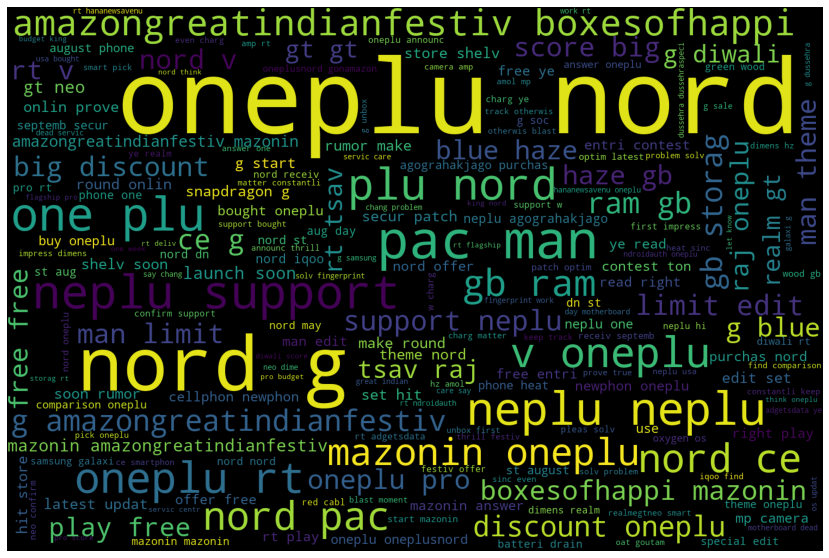

In [116]:
Create_WordCloud(-1)

In [117]:
prediction = mdl_rfc.predict(tfidf.transform(live_data['Clean_Tweets']))
live_data['Prediction']=prediction
live_data.to_csv('live_data.csv',)
live_data.head()

,ID,Created_at,Tweet,Clean_Tweets,Prediction
0,1449150486980923393,2021-10-15T23:09:34.000Z,I am using nord and nord 2. Please add same no...,use nord nord pleas add nord camera app nord w...,0
1,1449139057355808781,2021-10-15T22:24:09.000Z,OnePlus Nord 2 5G: Why you will love this supe...,oneplu nord g love superb rounder phone,2
2,1449109717452673024,2021-10-15T20:27:34.000Z,"dosto aur mobile phone experts, should i buy o...",dosto aur mobil phone expert buy oneplu nord s...,0
3,1449060350750461956,2021-10-15T17:11:24.000Z,@OnePlus_IN One plus Nord 2 very bad,neplu one plu nord bad,0
4,1449057398765670401,2021-10-15T16:59:40.000Z,@OnePlus_Support \nA bug is irritating me whil...,neplu support bug irrit use oneplu nord distru...,2


### Good Reviews

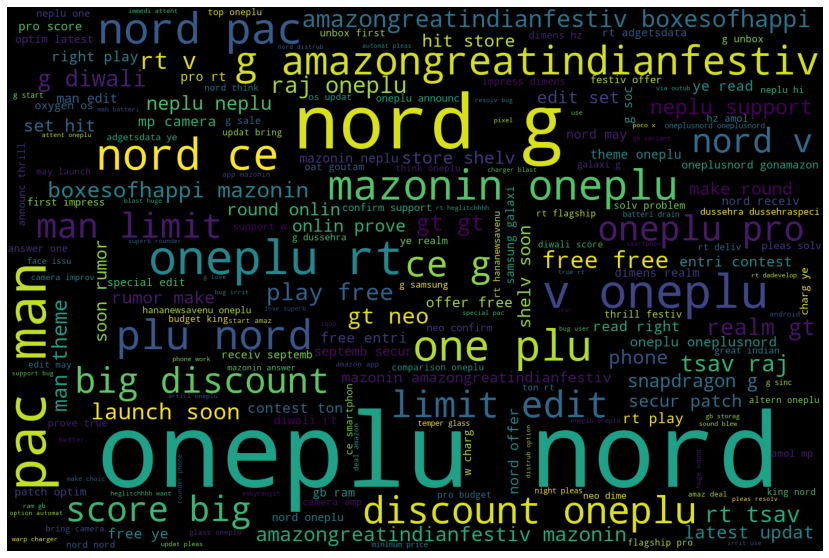

In [118]:
Create_WordCloud(2)

### Neutral Reviews 

In [119]:
Create_WordCloud(1)

ValueError: We need at least 1 word to plot a word cloud, got 0.

### Poor Reviews 

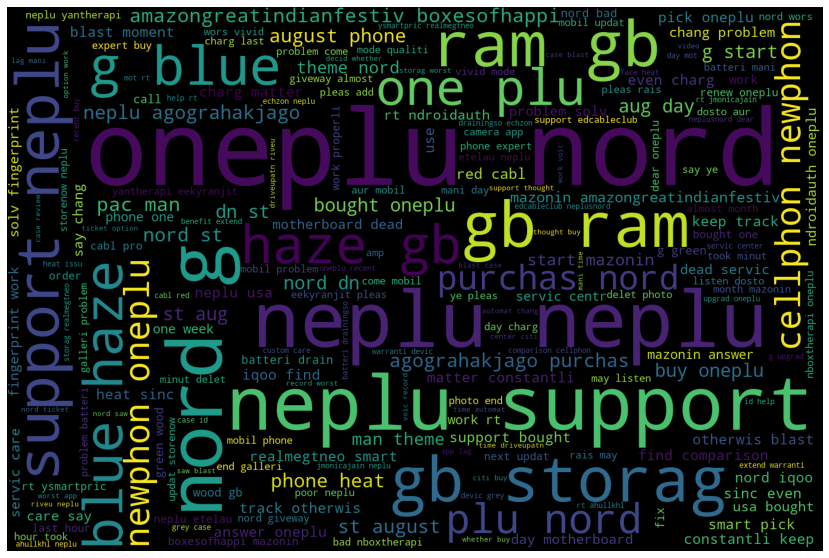

In [120]:
Create_WordCloud(0)

## Analysis by plotting graphs 

<AxesSubplot:>

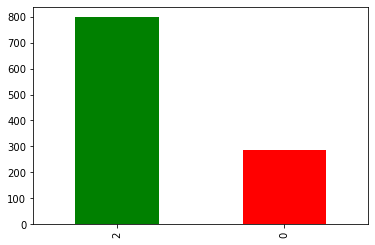

In [121]:
live_data['Prediction'].value_counts().plot(kind='bar',color=["green","red","blue"])

2    797
0    286
Name: Prediction, dtype: int64


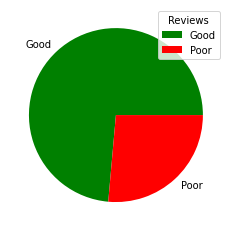

In [122]:
label_cnt=live_data['Prediction'].value_counts()
print(label_cnt)
reviews=["Good","Poor"]
cnt=[label_cnt[0],label_cnt[1]]
plt.pie(cnt,labels=reviews,colors=["green","red"])
plt.legend(title="Reviews",loc='best')
plt.show()